In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [2]:
df = pd.read_csv("Crop_Price_India.csv")
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


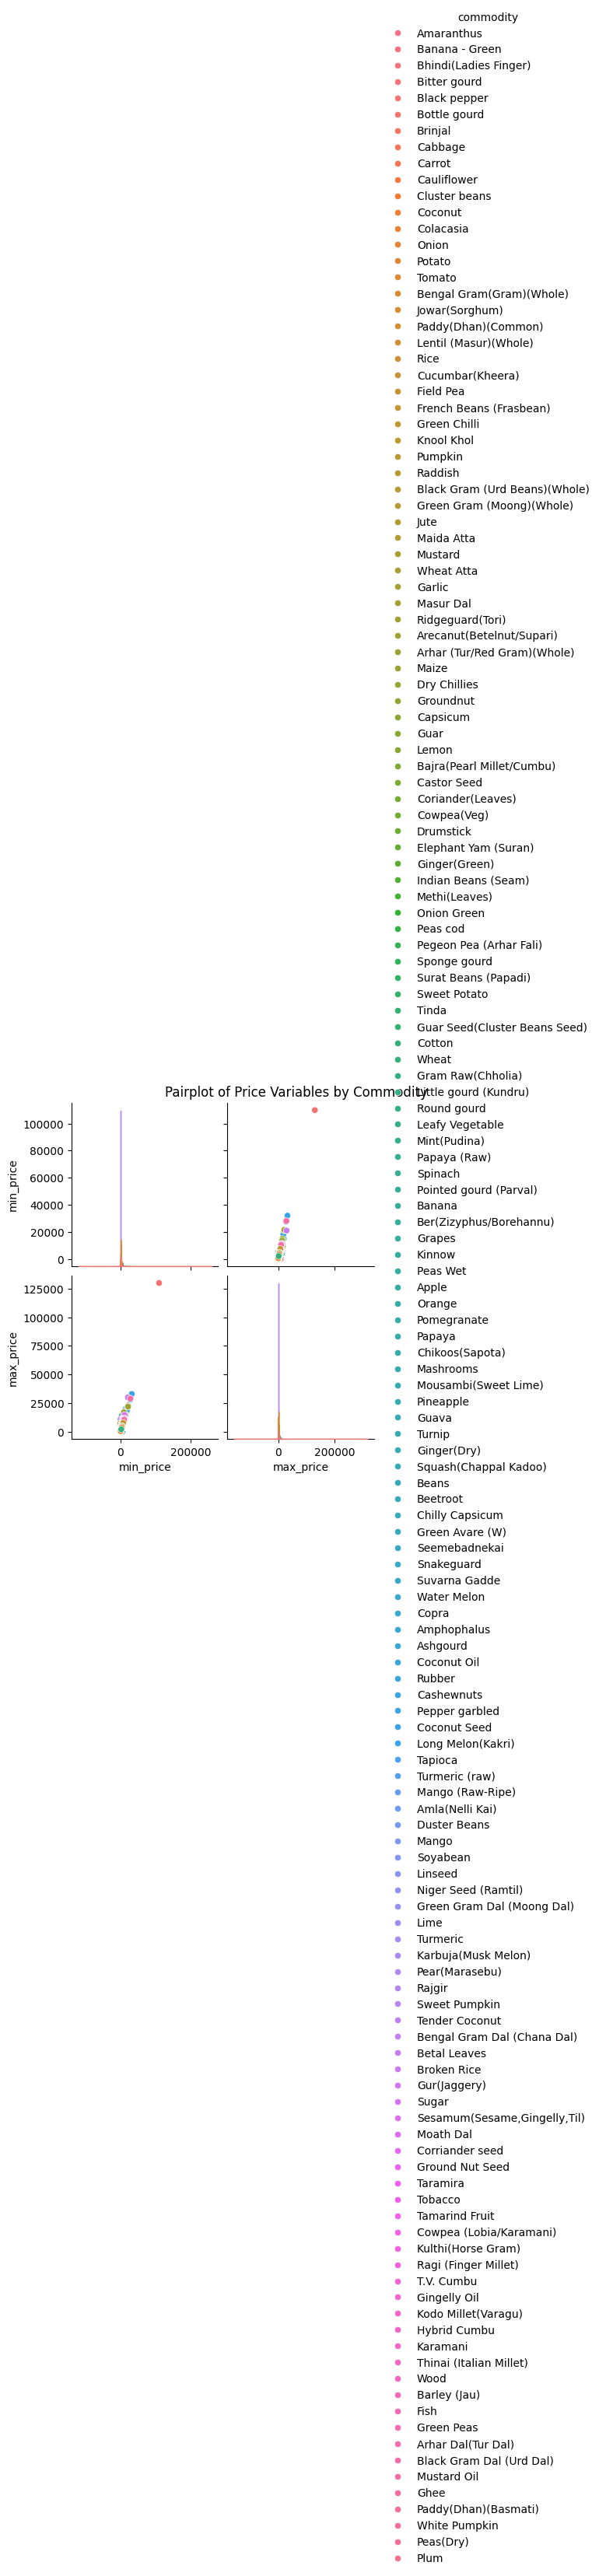

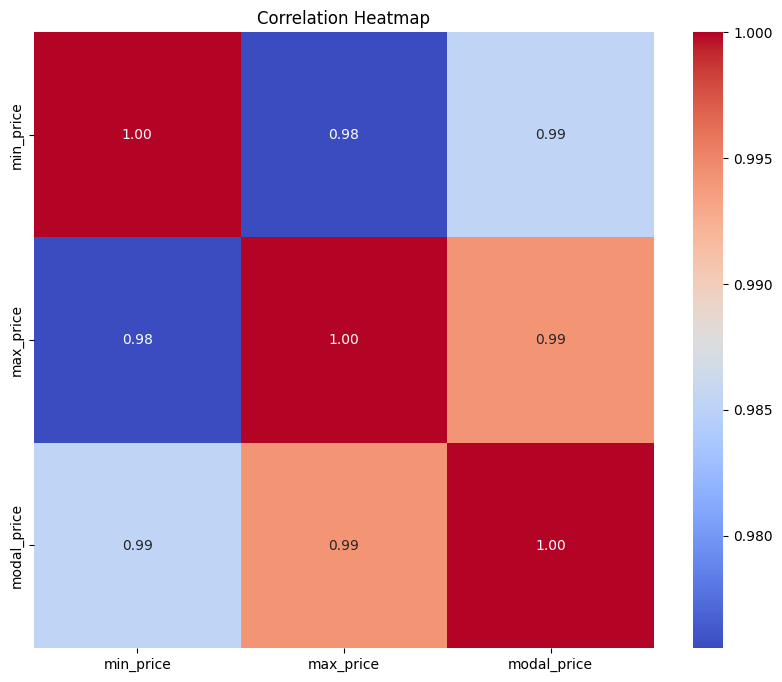

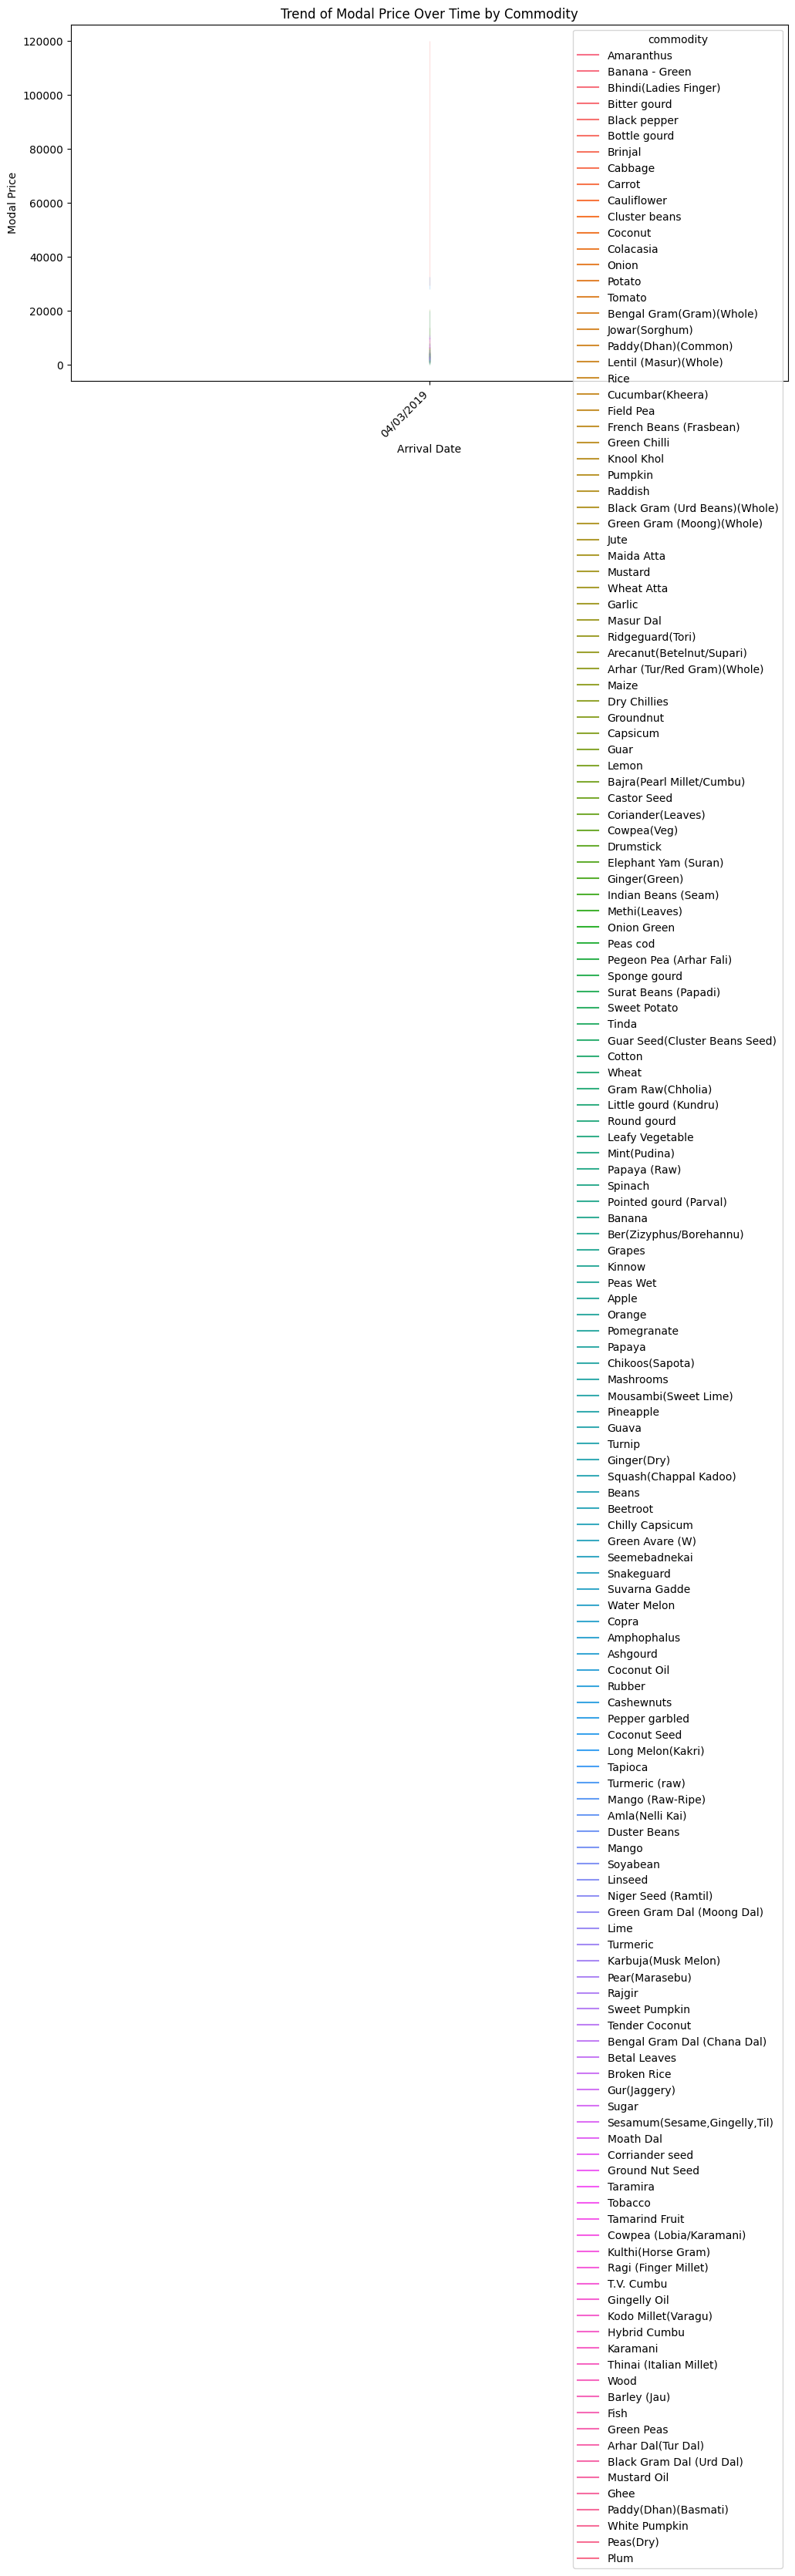

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, vars=['min_price', 'max_price'], hue='commodity')
plt.suptitle('Pairplot of Price Variables by Commodity', y=1.02)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[['min_price', 'max_price', 'modal_price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date', y='modal_price', data=df, hue='commodity')
plt.title('Trend of Modal Price Over Time by Commodity')
plt.xlabel('Arrival Date')
plt.ylabel('Modal Price')
plt.xticks(rotation=45, ha='right')
plt.show()


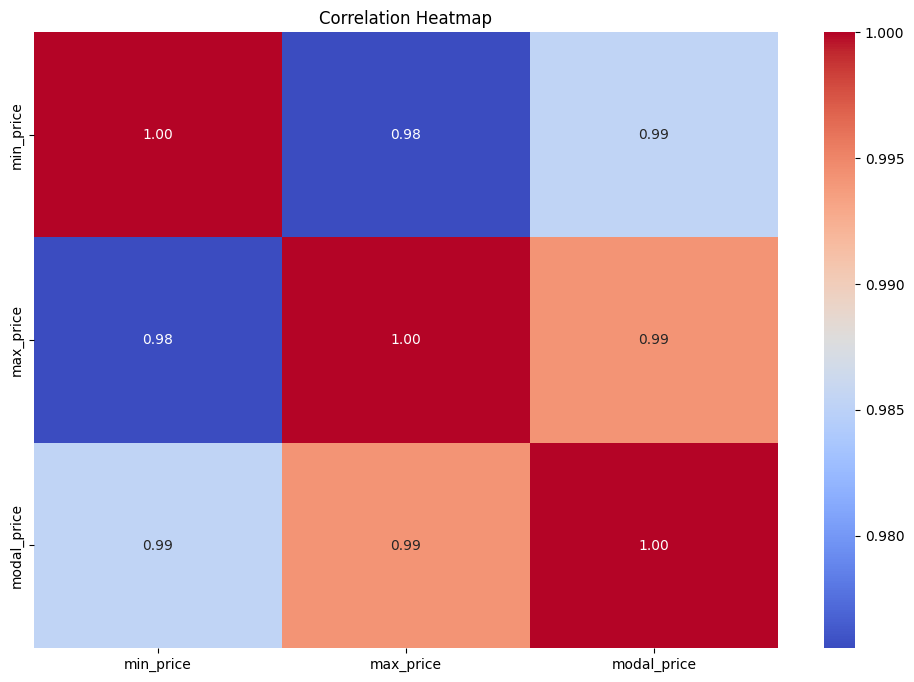

In [4]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [5]:
X = df.drop(columns=['modal_price'])
y = df['modal_price']


In [6]:
categorical_cols = ['state', 'district', 'market',  'commodity']

In [7]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [8]:
num_cols = ['min_price', 'max_price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded[num_cols])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:

svr_rbf = SVR(kernel='rbf')
svr_poly = SVR(kernel='poly')

svr_rbf.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

SVR(kernel='poly')

In [11]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))  # Adjust input shape
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [12]:
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=0)

In [13]:
svr_rbf_pred = svr_rbf.predict(X_test)
svr_poly_pred = svr_poly.predict(X_test)
rnn_pred = model.predict(X_test_rnn)

14/14 [==============================] - 0s 3ms/step


In [14]:
svr_rbf_mse = mean_squared_error(y_test, svr_rbf_pred)
svr_poly_mse = mean_squared_error(y_test, svr_poly_pred)
rnn_mse = mean_squared_error(y_test, rnn_pred)
print("SVR RBF MSE:", svr_rbf_mse)
print("SVR Polynomial MSE:", svr_poly_mse)
print("RNN MSE:", rnn_mse)

SVR RBF MSE: 6708089.712769019
SVR Polynomial MSE: 6330614.218760629
RNN MSE: 222493.8830270161


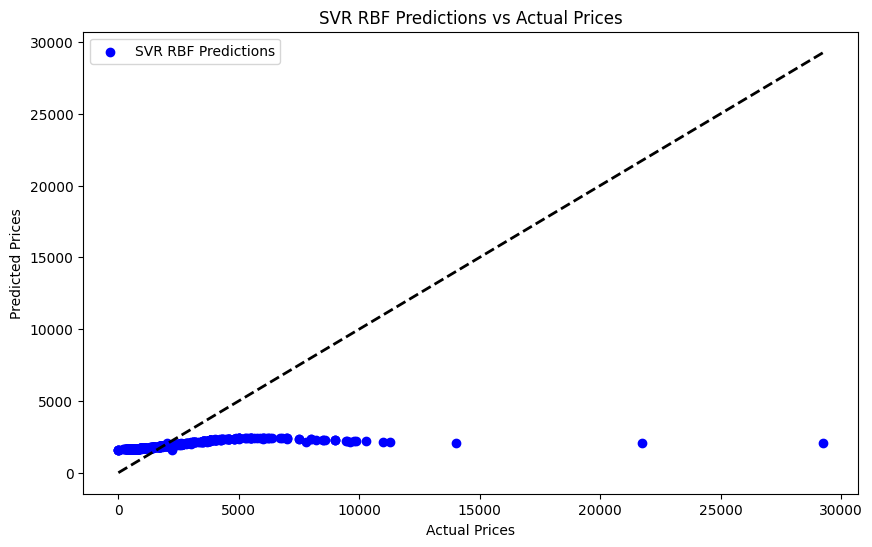

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_rbf_pred, color='blue', label='SVR RBF Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR RBF Predictions vs Actual Prices')
plt.legend()
plt.show()

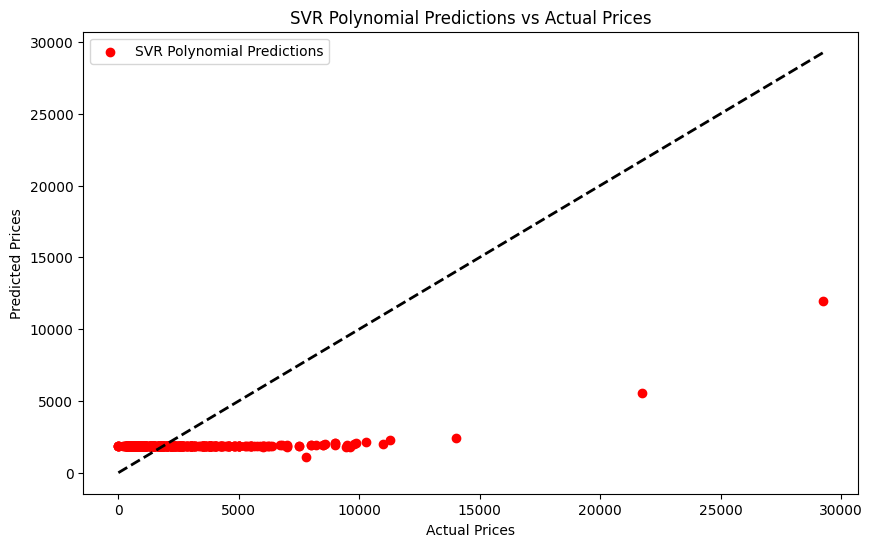

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_poly_pred, color='red', label='SVR Polynomial Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR Polynomial Predictions vs Actual Prices')
plt.legend()
plt.show()

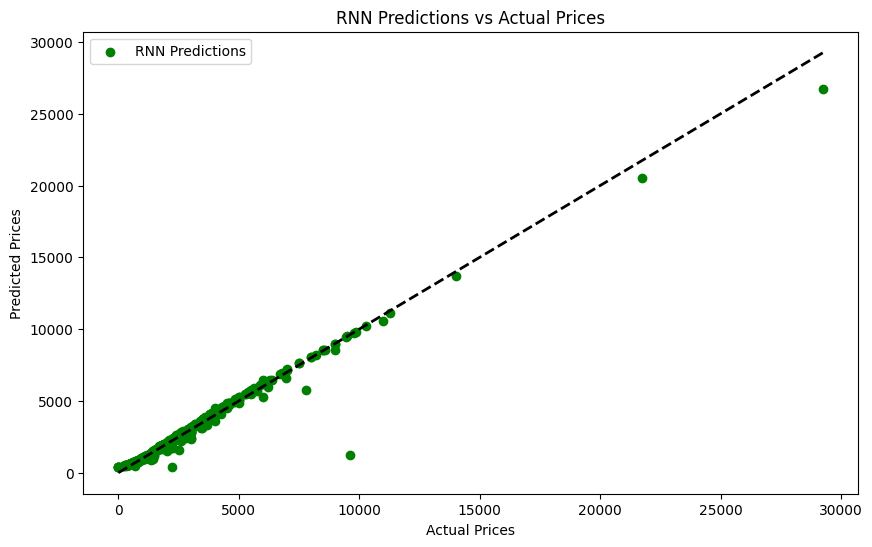

In [17]:
# Plot RNN predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rnn_pred, color='green', label='RNN Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('RNN Predictions vs Actual Prices')
plt.legend()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [19]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

ada_boost_model = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_boost_model.fit(X_train, y_train)

xgboost_model = XGBRegressor(n_estimators=100, random_state=42)
xgboost_model.fit(X_train, y_train)

linear_reg_preds = linear_reg_model.predict(X_test)
ada_boost_preds = ada_boost_model.predict(X_test)
xgboost_preds = xgboost_model.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
ada_boost_mse = mean_squared_error(y_test, ada_boost_preds)
xgboost_mse = mean_squared_error(y_test, xgboost_preds)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("AdaBoost Mean Squared Error:", ada_boost_mse)
print("XGBoost Mean Squared Error:", xgboost_mse)

Linear Regression Mean Squared Error: 66358.66328386204
AdaBoost Mean Squared Error: 476134.81172119686
XGBoost Mean Squared Error: 92027.14158261268


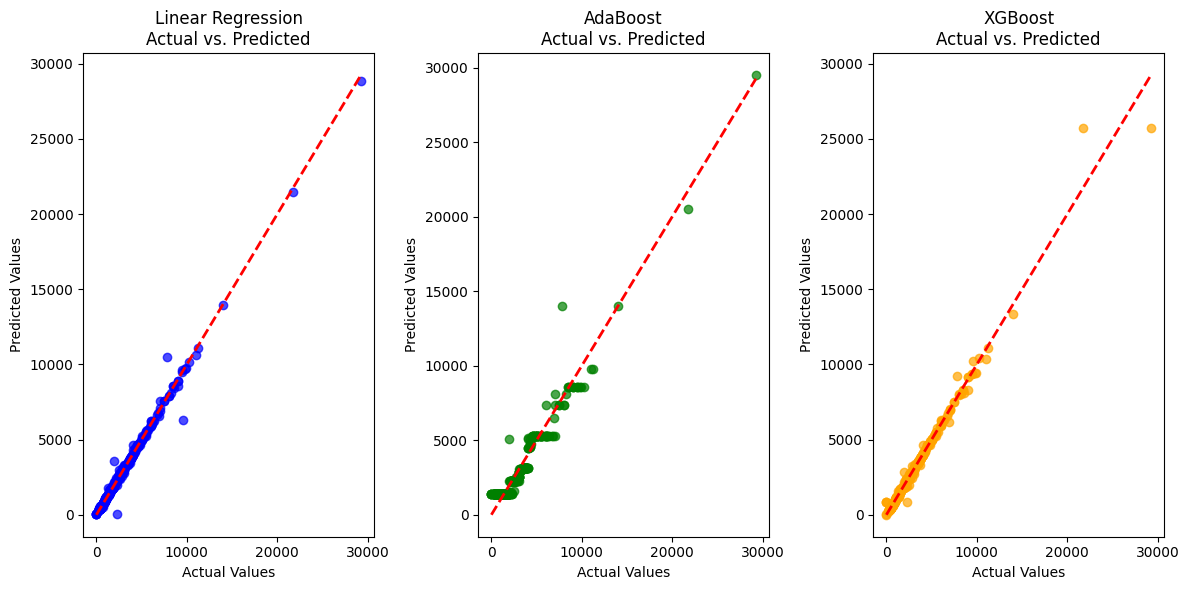

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_reg_preds, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression\nActual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 2)
plt.scatter(y_test, ada_boost_preds, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('AdaBoost\nActual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 3)
plt.scatter(y_test, xgboost_preds, color='orange', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('XGBoost\nActual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()
